<a href="https://colab.research.google.com/github/Rickmwasofficial/Road-signs-classification/blob/main/Traffic_Signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Sign Classification

This task is for building a model capable of identifying about 44 different traffic signs

Goals:

1. Data

The data was obtained from [Kaggle](https://www.kaggle.com/datasets/tuanai/traffic-signs-dataset)

Here the goal is to label all classes appropriately so we can easily use the `image_dataset_from_directory` method to load data much faster.

2. Modelling

Here the task is using an already trained model for feature extraction on our custom data.

After that we will fine-tune the feature extraction model, and see how it works on our data.

Then we will choose the best perfoming model among the two.

3. Testing

We will now evaluate our model visually on the test dataset

## Data

In [ ]:
# pip install tensorflow
import tensorflow as tf
tf.__version__

'2.17.0'

In [28]:
import zipfile

data = zipfile.ZipFile('/content/drive/MyDrive/traffic-signs-dataset.zip')
data.extractall()
data.close()

In [29]:
# Download helper functions to make our work easier
!wget https://raw.githubusercontent.com/Rickmwasofficial/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-09-18 14:08:51--  https://raw.githubusercontent.com/Rickmwasofficial/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-18 14:08:51 (71.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [30]:
# Import regularily used functions
from helper_functions import create_tensorboard_callback, walk_through_dir, plot_loss_curves

In [35]:
# Let's see what is in our downloaded folders
walk_through_dir('/content/DATA')

There are 52 directories and 0 images in '/content/DATA'.
There are 0 directories and 227 images in '/content/DATA/11'.
There are 0 directories and 67 images in '/content/DATA/38'.
There are 0 directories and 108 images in '/content/DATA/24'.
There are 0 directories and 248 images in '/content/DATA/26'.
There are 0 directories and 27 images in '/content/DATA/45'.
There are 0 directories and 210 images in '/content/DATA/18'.
There are 0 directories and 24 images in '/content/DATA/20'.
There are 0 directories and 109 images in '/content/DATA/12'.
There are 0 directories and 490 images in '/content/DATA/19'.
There are 0 directories and 128 images in '/content/DATA/0'.
There are 0 directories and 27 images in '/content/DATA/34'.
There are 0 directories and 117 images in '/content/DATA/13'.
There are 0 directories and 118 images in '/content/DATA/10'.
There are 0 directories and 75 images in '/content/DATA/49'.
There are 0 directories and 52 images in '/content/DATA/39'.
There are 0 directo

In [36]:
walk_through_dir('/content/TEST')

There are 52 directories and 0 images in '/content/TEST'.
There are 0 directories and 22 images in '/content/TEST/11'.
There are 0 directories and 3 images in '/content/TEST/38'.
There are 0 directories and 10 images in '/content/TEST/24'.
There are 0 directories and 12 images in '/content/TEST/26'.
There are 0 directories and 2 images in '/content/TEST/45'.
There are 0 directories and 10 images in '/content/TEST/18'.
There are 0 directories and 2 images in '/content/TEST/20'.
There are 0 directories and 9 images in '/content/TEST/12'.
There are 0 directories and 10 images in '/content/TEST/19'.
There are 0 directories and 4 images in '/content/TEST/0'.
There are 0 directories and 3 images in '/content/TEST/34'.
There are 0 directories and 11 images in '/content/TEST/13'.
There are 0 directories and 12 images in '/content/TEST/10'.
There are 0 directories and 9 images in '/content/TEST/49'.
There are 0 directories and 12 images in '/content/TEST/39'.
There are 0 directories and 14 imag

In [31]:
# read the labels csv file
import pandas as pd
labels_df = pd.read_csv('labels.csv')
labels_df.head(10)

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Unknown7


In [ ]:
labels_df.ClassId

,ClassId
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


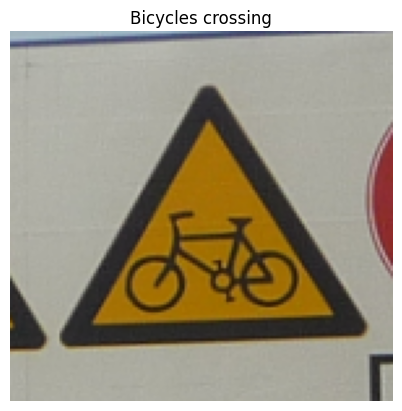

In [38]:
# Create a function to visualize the images randomly
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

labels_id = [i for i in range(0, 50)]
train_dir = 'DATA'
test_dir = 'TEST'

def view(dir):
  label = str(random.choice(labels_id))
  img_fld_link = os.path.join(dir, label)
  img_link = os.path.join(img_fld_link, random.choice(os.listdir(img_fld_link)))
  img = mpimg.imread(img_link)
  plt.imshow(img)
  plt.title(labels_df.iloc[int(label)].Name)
  plt.axis(False)
  plt.show()

view(train_dir)

To load our data we are going to use `tf.keras.preprocessing.image_dataset_from_directory` which is much faster

In [39]:
import tensorflow as tf
IMG_SIZE = (224, 224)  # Setting up a custom image size, which all images will be converted to
BATCH_SIZE = 32 # Any batch size other than 32 is bad for your health  😁

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'int',
    batch_size = BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size=IMG_SIZE,
    label_mode = 'int',
    batch_size = BATCH_SIZE
)

Found 5683 files belonging to 52 classes.
Found 433 files belonging to 52 classes.


In [ ]:
train_data.class_names  # Looking at the labels since this is a supervised learning problem

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '6',
 '7',
 '8',
 '9']

In [ ]:
# See examples of a batch of the data
for image, label in train_data.take(10):
  print(f'{image}, {label}')

[[[[ 25.         29.         16.       ]
   [ 25.196428   29.196428   15.803572 ]
   [ 25.660715   29.660715   15.339286 ]
   ...
   [ 25.696396   33.035675   13.357117 ]
   [ 28.01783    35.821396   15.214264 ]
   [ 29.         37.         16.       ]]

  [[ 25.         28.723215   15.723214 ]
   [ 25.250797   29.02838    15.689892 ]
   [ 25.843592   29.749681   15.611129 ]
   ...
   [ 25.226858   32.566135   12.9864235]
   [ 26.905752   34.709316   14.715062 ]
   [ 27.616072   35.61607    15.446428 ]]

  [[ 25.         28.205357   15.205358 ]
   [ 25.352518   28.713966   15.4772   ]
   [ 26.185745   29.916136   16.119738 ]
   ...
   [ 24.348368   31.687647   12.292868 ]
   [ 24.82509    32.628654   13.781074 ]
   [ 25.026787   33.026787   14.410714 ]]

  ...

  [[ 37.026764   38.205353   33.410706 ]
   [ 38.789364   39.736443   35.45041  ]
   [ 42.95551    43.355385   40.271523 ]
   ...
   [ 13.255433   13.255433   13.255433 ]
   [ 12.517545   12.517545   12.517545 ]
   [ 12.205353  

# 2. Feature Extraction

> ### **Non Augmented Data**

> First we will train a feature extraction model on non augmented data

Since we are going to use an efficientnt model for feature extraction, we do not have to normalize our data. If it was a Resnet we would have to implement data normalization

In [ ]:
# Create the base model
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    input_shape = (224, 224, 3)
)

# Freeze the layers so that the weights are not changed
base_model.trainable = False

# Get the inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass the inputs to the base model
x = base_model(inputs)

# Averagepool the model's output to aggregate the most important info and reduce computation
x = tf.keras.layers.GlobalAveragePooling2D(name='gap_layer')(x)

outputs = tf.keras.layers.Dense(52, name='output_layer', activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_1.summary() # A preview of the model

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap_layer (GlobalAveragePooling2D)   │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 52)                  │          66,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,985,924 (22.83 MB)

 Trainable params: 66,612 (260.20 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
# Training the first model on non-augmented data
hist_1 = model_1.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    callbacks = [create_tensorboard_callback(dir_name='Traffic Signs', experiment_name='non_augmented_feature_extraction')]
)

Saving TensorBoard log files to: Traffic Signs/non_augmented_feature_extraction/20240917-092443
Epoch 1/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 59s 172ms/step - accuracy: 0.3799 - loss: 2.5855 - val_accuracy: 0.5521 - val_loss: 1.7732
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step - accuracy: 0.8121 - loss: 0.9183 - val_accuracy: 0.6667 - val_loss: 1.3741
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9172 - loss: 0.5450 - val_accuracy: 0.7396 - val_loss: 1.1145
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9453 - loss: 0.3786 - val_accuracy: 0.8021 - val_loss: 0.6648
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9649 - loss: 0.2787

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 59s 278ms/step - accuracy: 0.9648 - loss: 0.2787 - val_accuracy: 0.8163 - val_loss: 0.8035


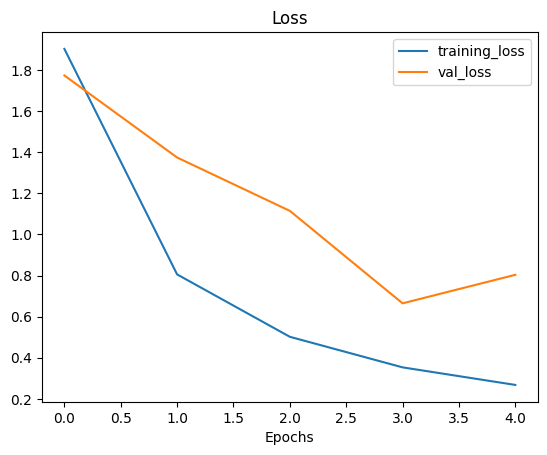

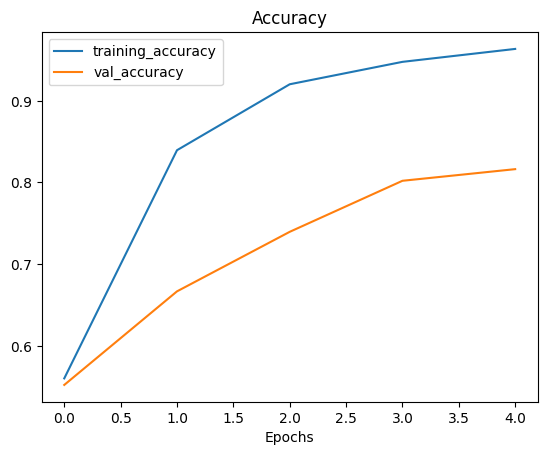

In [ ]:
# See how your model is perfoming/learning
plot_loss_curves(hist_1)

From the loss curves above, we see that the model is overfitting, which means it is learning more on the training data and not generalizing well to new and unseen data

We now have to implement data augmentation to try and counter this

In [ ]:
# Create data augmentation
from tensorflow.keras import layers
from tensorflow import keras

# create data augmentation
data_augmentation = keras.Sequential([
    layers.Resizing(224, 224),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
    # We could even normalize our values to 0 - 1 with preprocessing.rescale(1/255.)
], name = 'data_augmentation')

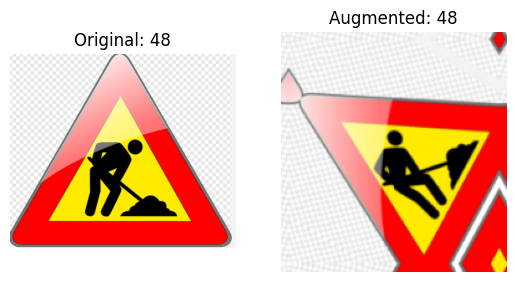

0.0 1.0
0.0 1.0


In [ ]:
# Testing if data augmentation worked
target_class = random.choice(train_data.class_names)
target_dir = 'DATA/' + target_class

random_image = random.choice(os.listdir(target_dir))
im_path = os.path.join(target_dir, random_image)

# read in random image
img = mpimg.imread(im_path)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title(f'Original: {target_class}')

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.subplot(1, 2, 2)
plt.title(f'Augmented: {target_class}')
plt.imshow(tf.squeeze(augmented_img))
plt.axis('off')
plt.show()

In [ ]:
# Create the base model
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    input_shape = (224, 224, 3)
)

# Freeze the layers so that the weights are not changed
base_model.trainable = False

# Get the inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# add in data augmentation
x = data_augmentation(inputs)

# Pass the inputs to the base model
x = base_model(x, training=False)

# Averagepool the model's output to aggregate the most important info and reduce computation
x = tf.keras.layers.GlobalAveragePooling2D(name='gap_layer')(x)

outputs = tf.keras.layers.Dense(52, name='output_layer', activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Training the second feature extractor on augmented data
hist_2 = model_2.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    callbacks = [create_tensorboard_callback(dir_name='Traffic Signs', experiment_name='augmented_feature_extraction')]
)

Saving TensorBoard log files to: Traffic Signs/augmented_feature_extraction/20240916-144137
Epoch 1/5
178/178 [==============================] - 46s 191ms/step - loss: 2.1160 - accuracy: 0.4857 - val_loss: 2.1728 - val_accuracy: 0.4271
Epoch 2/5
178/178 [==============================] - 35s 194ms/step - loss: 1.1209 - accuracy: 0.7376 - val_loss: 1.7943 - val_accuracy: 0.5625
Epoch 3/5
178/178 [==============================] - 37s 205ms/step - loss: 0.8209 - accuracy: 0.8140 - val_loss: 1.4491 - val_accuracy: 0.6250
Epoch 4/5
178/178 [==============================] - 34s 189ms/step - loss: 0.6346 - accuracy: 0.8617 - val_loss: 1.3234 - val_accuracy: 0.6667
Epoch 5/5
178/178 [==============================] - 28s 156ms/step - loss: 0.5270 - accuracy: 0.8881 - val_loss: 1.2633 - val_accuracy: 0.7188


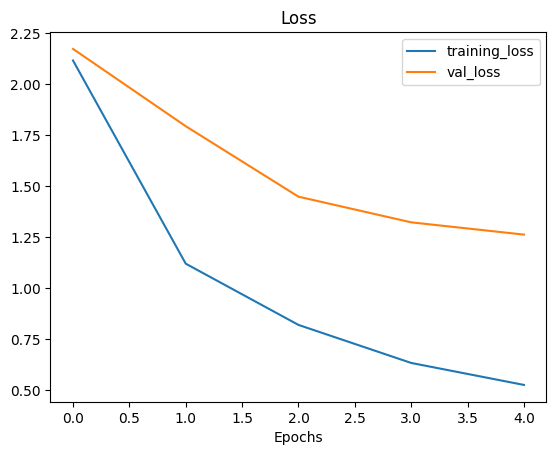

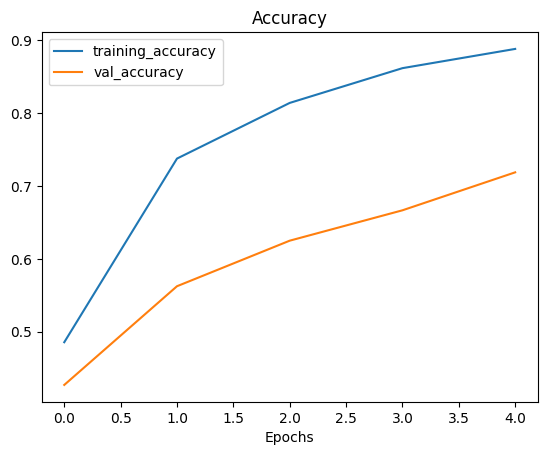

In [ ]:
plot_loss_curves(hist_2)# # Looking at the perfomance, it is still overfitting

## Let's try and fine tune the second model with data augmentation

and we will also try and train it for longer

In [ ]:
# Create the base model
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    input_shape = (224, 224, 3)
)

# Unfreeze all layers
base_model.trainable = True

# Freeze all layers except the last 10
for layer in base_model.layers[:-10]:
  layer.trainable= False

# Get the inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# add in data augmentation
x = data_augmentation(inputs)

# Pass the inputs to the base model
x = base_model(x, training=False)

# Averagepool the model's output to aggregate the most important info and reduce computation
x = tf.keras.layers.GlobalAveragePooling2D(name='gap_layer')(x)

outputs = tf.keras.layers.Dense(52, name='output_layer', activation='softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

# We have to recompile our model every time we make a change
model_3.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001), # Since we are updating already leaned weights, we don't want it to be updated too much so we use a lower learning rate
    metrics = ['accuracy']
)

In [ ]:
# Training the first fine tuned model on augmented data for longer
hist_3 = model_3.fit(
    train_data,
    epochs = 25,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    initial_epoch = hist_2.epoch[-1], # Start training from previous last epoch
    callbacks = [create_tensorboard_callback(dir_name='Traffic Signs', experiment_name='augmented_fine_tuning')]
)

Saving TensorBoard log files to: Traffic Signs/augmented_fine_tuning/20240916-144839
Epoch 5/25
178/178 [==============================] - 49s 195ms/step - loss: 2.6638 - accuracy: 0.3359 - val_loss: 2.8126 - val_accuracy: 0.2708
Epoch 6/25
178/178 [==============================] - 29s 161ms/step - loss: 1.3041 - accuracy: 0.6490 - val_loss: 1.9341 - val_accuracy: 0.4271
Epoch 7/25
178/178 [==============================] - 26s 147ms/step - loss: 0.8737 - accuracy: 0.7603 - val_loss: 1.7526 - val_accuracy: 0.4792
Epoch 8/25
178/178 [==============================] - 29s 162ms/step - loss: 0.6620 - accuracy: 0.8168 - val_loss: 1.3718 - val_accuracy: 0.5938
Epoch 9/25
178/178 [==============================] - 26s 144ms/step - loss: 0.5323 - accuracy: 0.8529 - val_loss: 1.4184 - val_accuracy: 0.6042
Epoch 10/25
178/178 [==============================] - 26s 145ms/step - loss: 0.4616 - accuracy: 0.8747 - val_loss: 0.9713 - val_accuracy: 0.7396
Epoch 11/25
178/178 [=======================

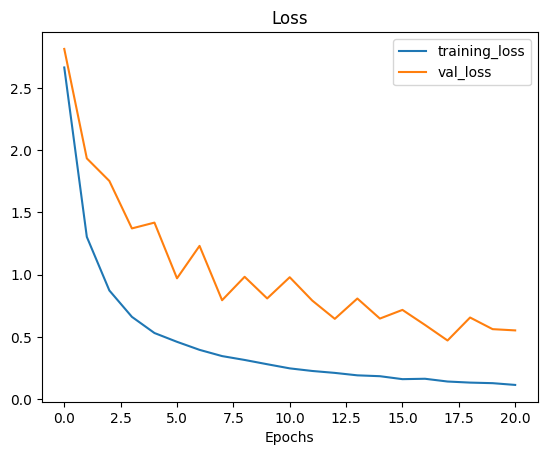

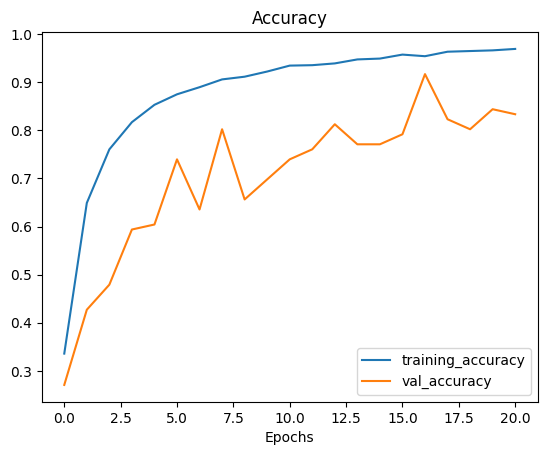

In [ ]:
plot_loss_curves(hist_3) # The model performs worse and it's still overfitting

In [ ]:
# Create the base model
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    input_shape = (224, 224, 3)
)

# Unfreeze all layers
base_model.trainable = True

# Freeze all layers except the last 10
for layer in base_model.layers[:-10]:
  layer.trainable= False

# Get the inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass the inputs to the base model
x = base_model(inputs)

# Averagepool the model's output to aggregate the most important info and reduce computation
x = tf.keras.layers.GlobalAveragePooling2D(name='gap_layer')(x)

outputs = tf.keras.layers.Dense(52, name='output_layer', activation='softmax')(x)

model_4 = tf.keras.Model(inputs, outputs)

# We have to recompile our model every time we make a change
model_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # Since we are updating already leaned weights, we don't want it to be updated too much so we use a lower learning rate
    metrics = ['accuracy']
)

In [ ]:
# Training the second fine-tuned model on non-augmented data
hist_4 = model_4.fit(
    train_data,
    epochs = 25,
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    initial_epoch = hist_1.epoch[-1], # Start training from previous last epoch
    callbacks = [create_tensorboard_callback(dir_name='Traffic Signs', experiment_name='non_augmented_fine_tuning')]
)

Saving TensorBoard log files to: Traffic Signs/non_augmented_fine_tuning/20240917-092835
Epoch 5/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 57s 172ms/step - accuracy: 0.2156 - loss: 3.4776 - val_accuracy: 0.3333 - val_loss: 2.6692
Epoch 6/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.6086 - loss: 1.9235 - val_accuracy: 0.4583 - val_loss: 2.1823
Epoch 7/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.7505 - loss: 1.2461 - val_accuracy: 0.5208 - val_loss: 1.7525
Epoch 8/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8223 - loss: 0.9103 - val_accuracy: 0.6562 - val_loss: 1.3253
Epoch 9/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.8714 - loss: 0.6903 - val_accuracy: 0.5918 - val_loss: 1.4166
Epoch 10/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.9100 - loss: 0.5229 - val_accuracy: 0.7500 - val_loss: 0.8477
Epoch 11/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9337 - loss: 0.4166 - val_accuracy: 0.8021 - val_loss: 0.857

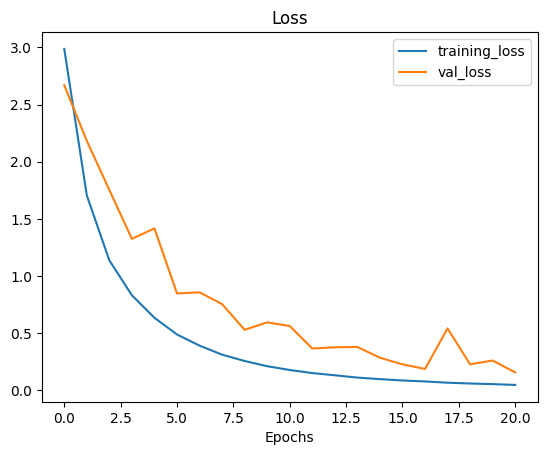

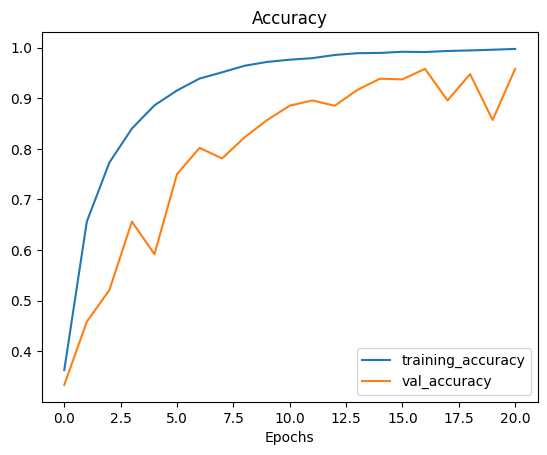

In [ ]:
plot_loss_curves(hist_4) # The model is performing much better and the curves are getting much similar which is great

In [ ]:
model_1.evaluate(test_data)

14/14 [==============================] - 4s 245ms/step - loss: 0.6196 - accuracy: 0.8730


[0.619616687297821, 0.8729792237281799]

In [ ]:
model_2.evaluate(test_data)

14/14 [==============================] - 2s 81ms/step - loss: 1.1762 - accuracy: 0.7044


[1.1762371063232422, 0.7043879628181458]

In [ ]:
model_3.evaluate(test_data)

14/14 [==============================] - 1s 66ms/step - loss: 0.5418 - accuracy: 0.8268


[0.5418445467948914, 0.8267898559570312]

In [ ]:
model_4.evaluate(test_data) # The fourth model has the highes accuracy

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9494 - loss: 0.2326


[0.2431344985961914, 0.9353348612785339]

So the best model is the fine tuned, model on non_augmented data

In [ ]:
model_4.save('/content/drive/MyDrive/traffic_efficient_net_B0_v1.keras') # Saving the model locally

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import random
import os
import matplotlib.pyplot as plt

# Reloading the saved model
model_4 = load_model('/content/drive/MyDrive/traffic_efficient_net_B0_v1.keras')

# This fuction accepts new images, preprocesses them, feeds it to a model and spits out a prediction
def make_prediction(filename, y_hat, model=model_4, img_shape=224):
    img = tf.io.read_file(filename)

    # Decode the image into a tensor
    img = tf.image.decode_image(img, channels=3)  # Ensure 3 channels (RGB)

    # Resize the image to the expected input shape
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image to [0, 1]
    img_1 = img / 255.0

    # Expand dimensions to fit model input
    img = tf.expand_dims(img, axis=0)

    # Make prediction
    preds = model.predict(img)

    # Print predictions for debugging
    # print("Predictions:", preds)

    # Get the class index with the highest probability
    predicted_class_index = tf.argmax(preds[0])
    # print(preds[0])
    # print(train_data.class_names[int(predicted_class_index)])

    # Map the class index to class name
    value = labels_df.iloc[int(train_data.class_names[int(predicted_class_index)])].Name

    if y_hat == value:
      plt.imshow(img_1)
      plt.axis('off')
      plt.title(f'Prediction: {value}, True: {y_hat} Probability: {np.max(preds[0]):.2f}', c='g')
    else:
      plt.imshow(img_1)
      plt.axis('off')
      plt.title(f'Prediction: {value}, True: {y_hat} Probability: {np.max(preds[0]):.2f}', c='r')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


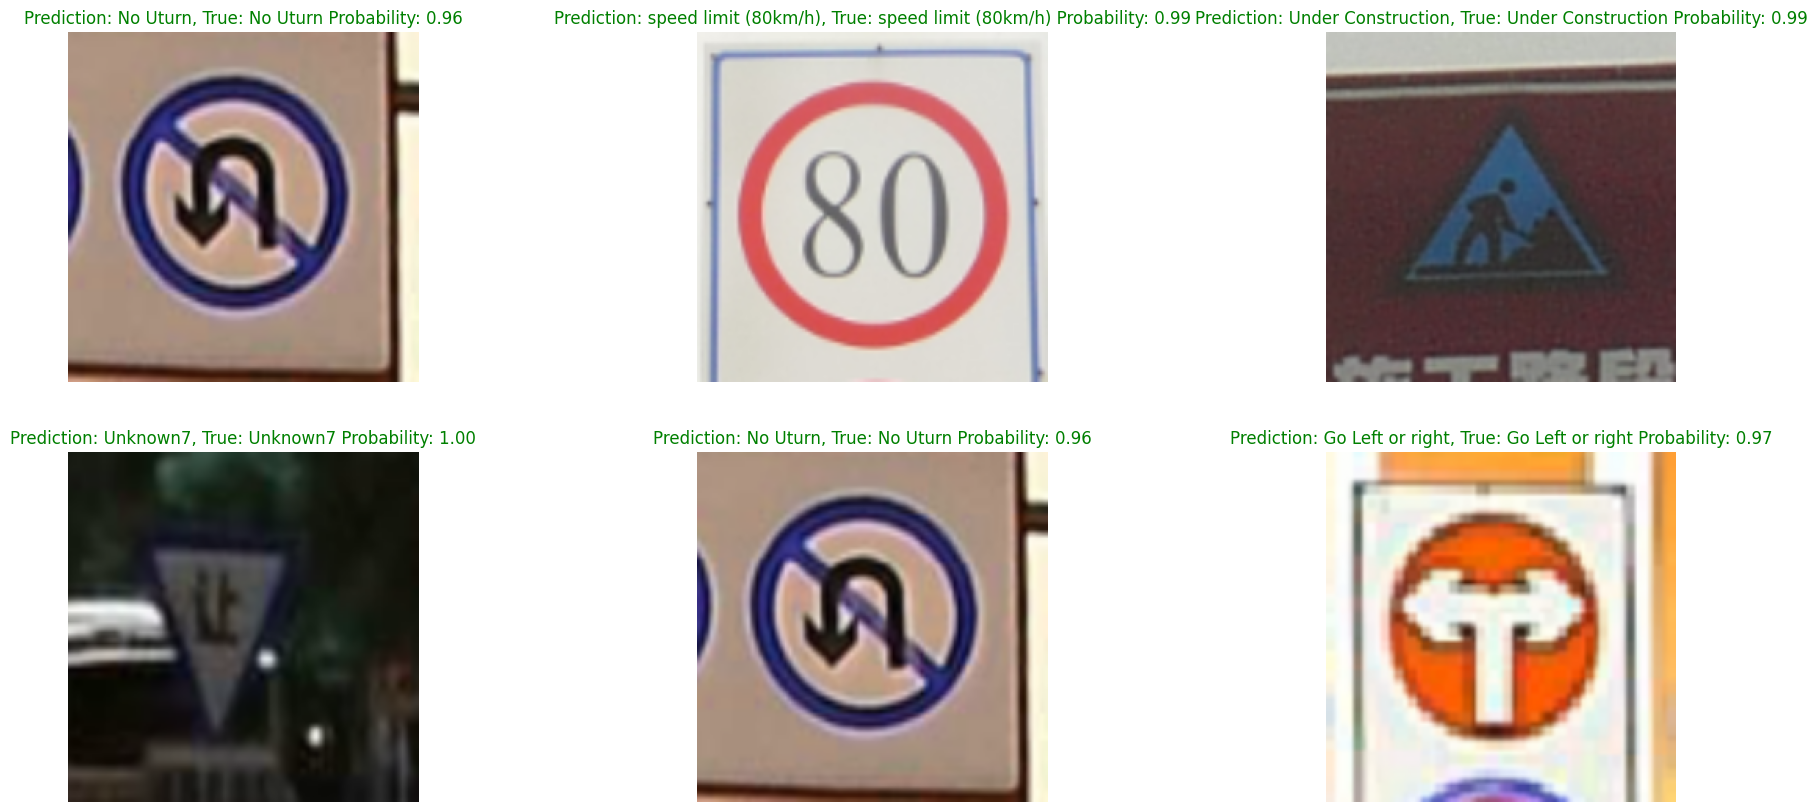

In [45]:
# predicting on numerous images and visualizing them

plt.figure(figsize=(23, 10))
for i in range(1, 7):
  plt.subplot(2, 3, i)
  labels_id = [i for i in range(0, 53)]
  train_dir = 'DATA'
  test_dir = 'TEST'

  label = str(random.choice(labels_id))
  img_fld_link = os.path.join(test_dir, label)
  img_link = os.path.join(img_fld_link, random.choice(os.listdir(img_fld_link)))

  make_prediction(img_link, labels_df.iloc[int(label)].Name)